# Predictive Modeling of Customer Spending in E-commerce

In today's digital age, understanding customer behavior and engagement has become paramount for businesses striving to enhance their profitability and customer satisfaction. The E-commerce Dataset provides a rich source of information that can be leveraged to predict the yearly amount spent by customers based on various factors such as website time, app time, length of membership, and session length. By developing a regression model on this dataset, we can not only gain insights into the key drivers of customer spending but also apply these findings to optimize marketing strategies, personalize customer experiences, and ultimately drive revenue growth in the competitive e-commerce landscape.

The data comes from a test dataset freely available on Kaggle. Note that this is a training set and the information does not correspond to real people.

Linear Regression E-commerce Dataset - "https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website"

We use regression to help the company make a decision on wether to focus on the mobile app or the website to increase its revenue

In [16]:
#We import the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [17]:
#we import the dataset
customers = pd.read_csv('Ecommerce Customers')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
print("The number of rows and columns: " + str(customers.shape))
print('\nThe columns are: \n')
[print(i,end='.\t\n') for i in customers.columns]

The number of rows and columns: (500, 8)

The columns are: 

Email.	
Address.	
Avatar.	
Avg. Session Length.	
Time on App.	
Time on Website.	
Length of Membership.	
Yearly Amount Spent.	


[None, None, None, None, None, None, None, None]

## Analyzing the Dataset
we first used the .describe() method to get an overview of the numerical variables, including Avg. Session Length, Time on App, Time on Website, Length of Membership, and Yearly Amount Spent. This provided us with key statistics such as mean, standard deviation, minimum, maximum, and quartile values, giving us a better understanding of the data distribution.

In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Next, we calculated the correlation coefficients between variables using the .corr() method. We focused on the relationship between Length of Membership and Yearly Amount Spent, which showed a strong positive correlation, indicating that longer memberships tend to result in higher yearly spending.

In [5]:
selected_columns = ['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']
corr = customers[selected_columns].corr()
corr['Yearly Amount Spent'].sort_values(ascending=True)

Time on Website        -0.002641
Avg. Session Length     0.355088
Time on App             0.499328
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

To visualize this relationship, we used the lmplot() function from Seaborn, which created a scatter plot with a linear regression line. This plot visually confirmed the positive correlation between Length of Membership and Yearly Amount Spent, highlighting the importance of customer loyalty in driving spending behavior in the e-commerce platform.

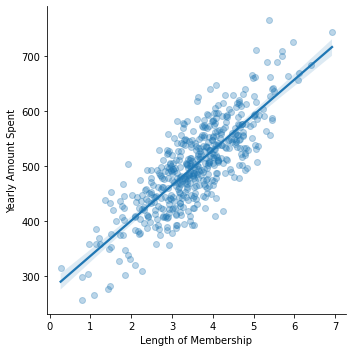

In [6]:
# length of membership vs yearly amount spent
sns.lmplot(x='Length of Membership', 
           y='Yearly Amount Spent', 
           data=customers,
           scatter_kws={'alpha':0.3})

## Splitting the Data
To begin the analysis, we split the dataset into training and testing sets using the train_test_split function from sklearn.model_selection. This step allows us to train the model on a subset of the data and evaluate its performance on unseen data.

In [7]:
from sklearn.model_selection import train_test_split
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Building the Linear Regression Model
With the data split, we then construct a linear regression model using the LinearRegression class from sklearn.linear_model. This model will predict the Yearly Amount Spent based on the features Avg. Session Length, Time on App, Time on Website, and Length of Membership. The fit method is used to train the model on the training data (X_train and y_train).

In [10]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# The coefficients in a dataframe

LinearRegression()

## Interpreting the Coefficients
To understand the impact of each feature on the target variable, we examine the coefficients of the linear regression model. 

In [18]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


## Model Evaluation
Finally, we evaluate the performance of the model using the test data. The score method computes the coefficient of determination (R^2), which indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Additionally, we calculate the Mean Squared Error (MSE) between the actual and predicted values using the mean_squared_error function from sklearn.metrics. A lower MSE indicates a better fit of the model to the data.

In [12]:
lm.score(X_test, y_test)

0.9808757641125855

In [14]:
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 103.91554136503333


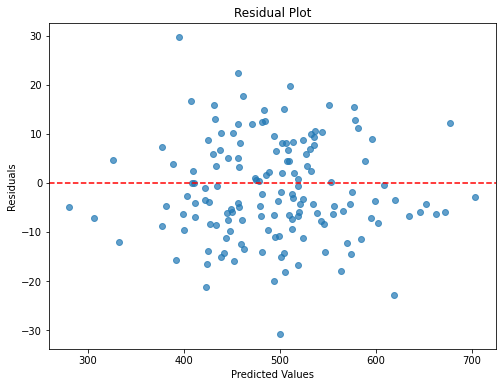

In [20]:
residuals = y_test - y_pred

# Create residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Interpreting The Results
The linear regression model achieved a coefficient of determination (R²) of 0.98, indicating that approximately 98% of the variance in the Yearly Amount Spent can be explained by the features Avg. Session Length, Time on App, Time on Website, and Length of Membership. The coefficient for Length of Membership is 61.67, suggesting that for each unit increase in the length of membership, we can expect a 61.67 increase in the yearly amount spent, holding all other features constant. The mean squared error (MSE) of 103.91 indicates the average squared difference between the actual and predicted yearly amount spent, providing a measure of the model's accuracy. Further analysis of residual plots suggests that the model assumptions are reasonably met, with residuals evenly scattered around the horizontal line at y=0 and a roughly normal distribution. Overall, the model demonstrates a good fit to the data and provides valuable insights into the factors influencing customer spending behavior in the e-commerce platform.